<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=5> I.F. RENATTA GARCIA SANCHEZ</font> <br> <br>
    
<center><font color=#555555><font size=5>I. F. MARIO ABEL GARCIA VERDUZCO</font> <br> <br>
    
<center><font color=#555555><font size=5>I. F. ALEJANDRO MICHEL MARRON</font> <br> <br>
   
<center> <font color= #555555> <font size = 4> July 2021 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/HKael/myst_proyecto_eq4'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 5:  </font> <br> <br> <font color= #555555> <font size = 5> Currency Pair Fundamental Analysis  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  Include here a description of the whole work, use no more than 400 words, you can use **Bold** and *Italic* highlights, also you can inclue [links](www.iteso.mx). Usually is a good strategy to generate this text at the very end of the process, since you have to include all aspects of the work, from a brief introduction, to problem definitions and methods used, to finally the results found. </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

This is an introduction, normally, it is done at the very end, when all the other content in the notebook is completed but just before the abstract (which is short version of the introduction) ... 

<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy import stats
from scipy.stats import shapiro
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import scikit_posthocs as sp
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 2.2 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.1.0
- numpy>=1.19.1
- jupyter>=1.0.0
- chart_studio>=1.1
- plotly>=4.14
- statsmodels
- MetaTrader5

## <font color= #6B6B6B> 2.3 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files\\Unemployment Rate - United States.csv : United States Unemployment Rate historical data

## <font color= #6B6B6B> 2.4 Install Packages </font> <font color= #555555>
Run the following cell to install the required packages for the project


In [1]:
%%capture

# Install all the pip packages in the requirements.txt

import sys
!{sys.executable} -m pip install -r requirements.txt

# <font color= #6B6B6B> 3. Data Description </font>

<hr style="border:0.02in solid gray"> </hr>

In [4]:
import pandas as pd 
import main as mn 
import functions as fn
import data as dt
import visualizations as vs

import warnings
warnings.filterwarnings('ignore')
pd.DataFrame.less = lambda df, n=10: df.head(n//2).append(df.tail(n//2))

### <font color= #6B6B6B> Unemployment Rate data </font>

<p style='text-align: justify;'>The first file that we're going to consider is the <strong>Unemployment Rate</strong> historic data released by the US Bureau of Labor Statistics is a percentage that surges from dividing the number of unemployed workers by the total civilian labor force. It represents the percentage of people actively seeking employment and willing to work. Usually, as a higher rate is seen in recessionary economies, while on the ​contrary, a growing economy sees its unemployment rate decreasing. Therefore, a decrease of the figure is seen as positive (or bullish) for the USD, while an increase is seen as negative (or bearish), although by itself, the number can't determinate the markets move as it depends on the headline reading, the Nonfarm Payroll. 
    
Ex:</p> 

In [5]:
mn.indice.less(5)

,Actual,Consensus,Previous
DateTime,,,
2020-02-07 13:30:00,3.6,3.5,3.5
2020-01-10 13:30:00,3.5,3.5,3.5
2007-04-06 12:30:00,4.4,4.6,4.5
2007-03-09 13:30:00,4.5,4.6,4.4


### <font color= #6B6B6B> USD/CHF pair price per minute</font>

comentario:.................

In [6]:
mn.escenario1.less(5)

,time,open,high,low,close,tick_volume,spread,real_volume
0,2016-06-03 12:30:00,0.99184,0.99187,0.99174,0.99183,58,20,891500000
1,2016-06-03 12:31:00,0.99184,0.99186,0.99179,0.99185,39,20,562000000
29,2016-06-03 12:59:00,0.99160,0.99161,0.99116,0.99122,67,21,65230000
30,2016-06-03 13:00:00,0.99123,0.99128,0.99112,0.99114,72,21,95850000


# <font color= #6B6B6B> 5. Financial Aspects
</font>

<hr style="border:0.02in solid gray"> </hr>

### <font color= #6B6B6B>Visual Validation #1 </font>

In [7]:
vs.candle_stick_plot(mn.escenario1)

In [8]:
mn.indice[mn.escenario1.iloc[0]['time'].strftime('%Y-%m-%d')]

,Actual,Consensus,Previous
DateTime,,,
2016-06-03 12:30:00,4.7,4.9,5.0


**Price Reaction:** We see that the actual value was less than consensus and previous, so we ended with a lower price for each USD in our 30 minutes window.

### <font color= #6B6B6B>Visual Validation #2 </font>

In [9]:
vs.candle_stick_plot(mn.escenario2)

In [10]:
mn.indice[mn.escenario2.iloc[0]['time'].strftime('%Y-%m-%d')]

,Actual,Consensus,Previous
DateTime,,,
2019-09-06 12:30:00,3.7,3.7,3.7


**Price Reaction:**
The actual value was the same as consensus and previous, and we ended with a slightly upper price for each USD in our 30 minutes window.

### <font color= #6B6B6B>Visual Validation #3 </font>

In [12]:
vs.candle_stick_plot(mn.escenario3)

In [13]:
mn.indice[mn.escenario3.iloc[0]['time'].strftime('%Y-%m-%d')]

,Actual,Consensus,Previous
DateTime,,,
2016-11-04 12:30:00,4.9,4.9,5.0


**Price Reaction:**
The actual value was the same as the consensus but lower than the previous, so we ended with a slightly lower price for each USD in our 30 minutes window.

### <font color= #6B6B6B>Visual Validation #4 </font>

In [15]:
vs.candle_stick_plot(mn.escenario4)

In [16]:
mn.indice[mn.escenario4.iloc[0]['time'].strftime('%Y-%m-%d')]

,Actual,Consensus,Previous
DateTime,,,
2009-05-08 12:30:00,8.9,8.9,8.5


**Price Reaction:**
The actual value was the same as the consensus but higher than the previous. Also, we ended with a slightly lower price for each USD in our 30 minutes window.

### <font color= #6B6B6B>Visual Validation #5 </font>

In [18]:
vs.candle_stick_plot(mn.escenario5)

In [19]:
mn.indice[mn.escenario5.iloc[0]['time'].strftime('%Y-%m-%d')]

,Actual,Consensus,Previous
DateTime,,,
2016-12-02 13:30:00,4.6,4.9,4.9


**Price Reaction:**
The actual value was lower than consensus and previous. We ended with a slightly higher price for each USD in our 30 minutes window.

In [4]:
# DELETE THIS CELL IN YOUR FILE

# Another particular process that is relevant for the work. Normally, you include between 2 and 5 at the most.

# <font color= #6B6B6B> 6. Statistical Aspects
</font>

<hr style="border:0.02in solid gray"> </hr>

### <font color= #6B6B6B> Autocorrelation and Partial Autocorrelation Functions
</font>

Just as correlation measures the extent of a linear relationship between two variables, autocorrelation (ACF) measures the linear relationship between lagged values of a time series. In time series analysis, the partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

This function plays an important role in data analysis aimed at identifying the extent of the lag in an autoregressive model. 


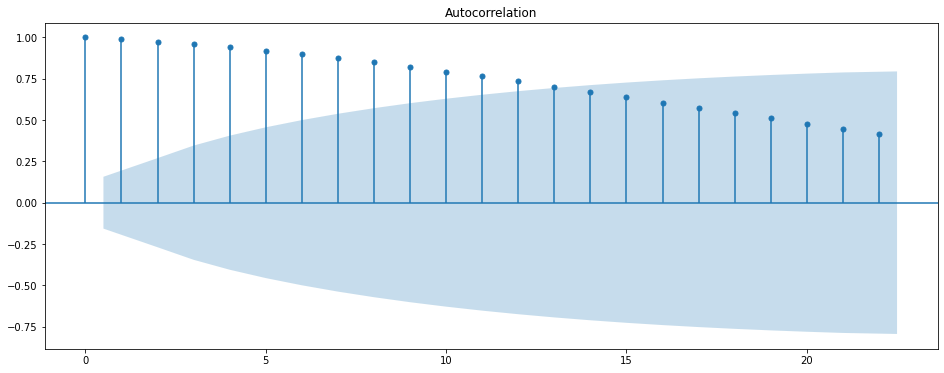

In [42]:
acf(indice["Actual"])

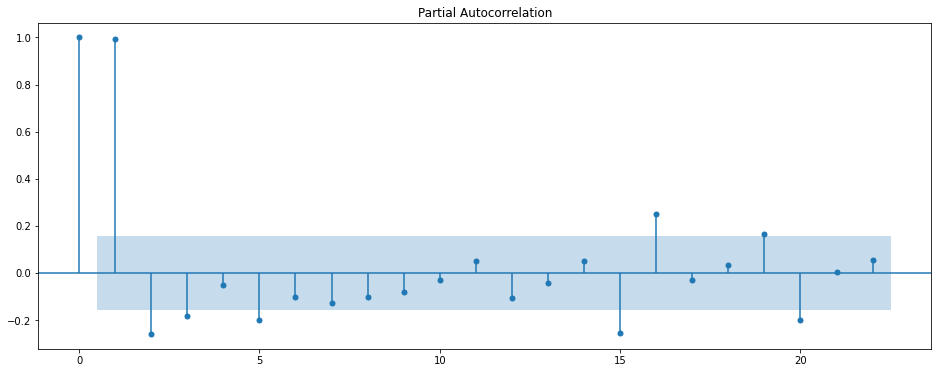

In [43]:
pacf(indice["Actual"])

### <font color= #6B6B6B> Heteroscedasticity Test
</font>

Heteroscedasticity means unequal scatter. The concept of heteroscedasticity - the opposite being homoscedasticity - is used in statistics, especially in the context of linear regression or for time series analysis, to describe the case where the variance of errors or the model is not the same for all observations, while often one of the basic assumption in modeling is that the variances are homogeneous and that the errors of the model are identically distributed.

In linear regression analysis, the fact that the errors of the model (also named residuals) are not homoskedastic has the consequence that the model coefficients estimated using ordinary least squares (OLS) are neither unbiased nor those with minimum variance. The estimation of their variance is not reliable.

<font color= #6B6B6B> <font size = 4> Regression
</font>

In [162]:
regression(indice.index, indice["Actual"])

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     85.35
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           1.90e-16
Time:                        14:32:11   Log-Likelihood:                -301.03
No. Observations:                 156   AIC:                             606.1
Df Residuals:                     154   BIC:                             612.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1628      0.267     15.573      0.0

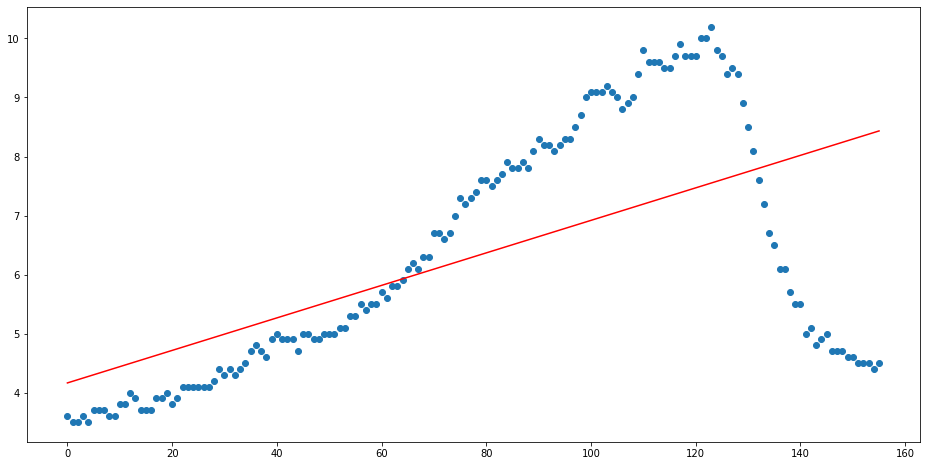

In [163]:
regression_v(indice.index, indice["Actual"])

In statistics, the Breusch–Pagan test, developed in 1979 by Trevor Breusch and Adrian Pagan, is used to test for heteroskedasticity in a linear regression model. It was independently suggested with some extension by R. Dennis Cook and Sanford Weisberg in 1983 (Cook–Weisberg test). Derived from the Lagrange multiplier test principle, it tests whether the variance of the errors from a regression is dependent on the values of the independent variables. In that case, heteroskedasticity is present.

In [167]:
heteroskedasticity(indice)

LM Statistic: 19.950616
LM Statistic p-value: 0.000008
F-Statistic: 11.291469
F-Statistic p-value: 0.000027
Heteroskedasticity is indicated if p <0.05, so according to these tests, this model is heteroskedastic.


### <font color= #6B6B6B> Normality Test
</font>

Normality tests are used to determine if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed. The normal distribution is a theoretical distribution. What you are really testing with the normality test is not whether your data is exactly consistent with a normal distribution, but whether your data is close enough to normal that you can use your statistical tool without concern.

The Shapiro-Wilk test, published in 1965 by Samuel Sanford Shapiro and Martin Wilk, was used.

In [44]:
norm_test(indice["Actual"])

Statistics=0.906, p=0.000
Sample does not look Gaussian (reject H0)


### <font color= #6B6B6B> Stationarity
</font>

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.


In [45]:
stationarity(indice["Actual"])

ADF Statistic: -1.672648
p-value: 0.445257
Critical Values:
No stationarity detected


### <font color= #6B6B6B> Seasonality
</font>

Time series data may contain seasonal variation. Seasonal variation, or seasonality, are cycles that repeat regularly over time. A repeating pattern within each year is known as seasonal variation, although the term is applied more generally to repeating patterns within any fixed period.

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
Non-Systematic: Components of the time series that cannot be directly modeled.
A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

-Level: The average value in the series.

-Trend: The increasing or decreasing value in the series.

-<font color= green> Seasonality: The repeating short-term cycle in the series. </font>

-Noise: The random variation in the series.

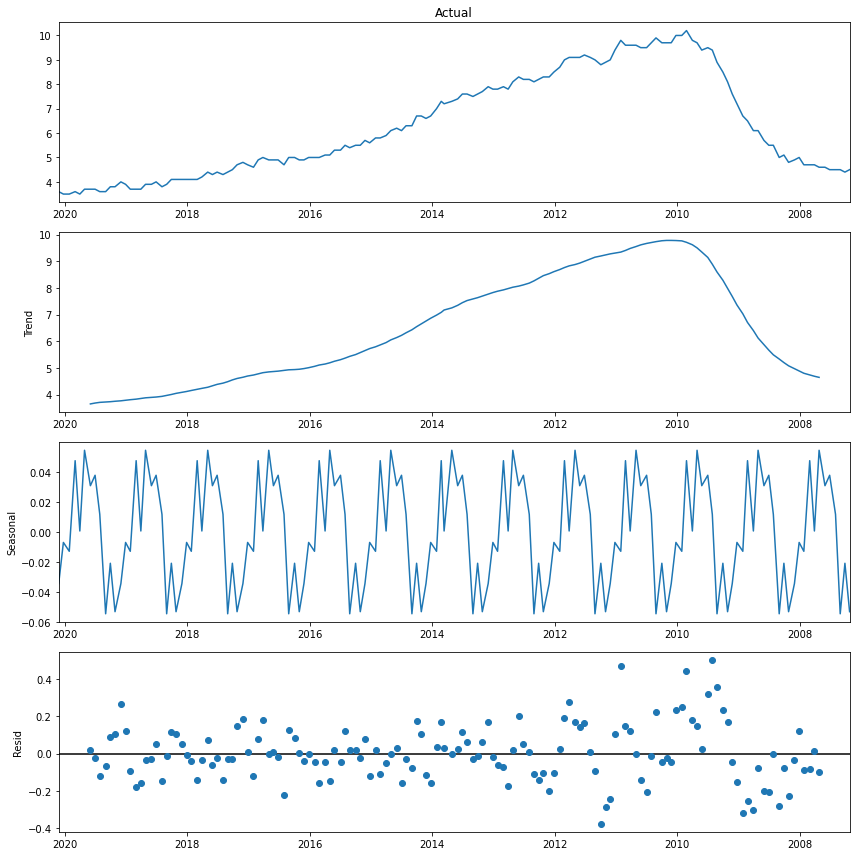

In [46]:
seasonality(indice["Actual"])

### <font color= #6B6B6B> Outlier detection
</font>

An outlier is an observation that appears to deviate markedly from other observations in the sample.
Identification of potential outliers is important for the following reasons.

An outlier may indicate bad data. For example, the data may have been coded incorrectly or an experiment may not have been run correctly. If it can be determined that an outlying point is in fact erroneous, then the outlying value should be deleted from the analysis (or corrected if possible).
In some cases, it may not be possible to determine if an outlying point is bad data. Outliers may be due to random variation or may indicate something scientifically interesting. In any event, we typically do not want to simply delete the outlying observation. However, if the data contains significant outliers, we may need to consider the use of robust statistical techniques.

In statistics, Grubbs's test or the Grubbs test, also known as the maximum normalized residual test or extreme studentized deviate test, is a test used to detect outliers in a univariate data set assumed to come from a normally distributed population.

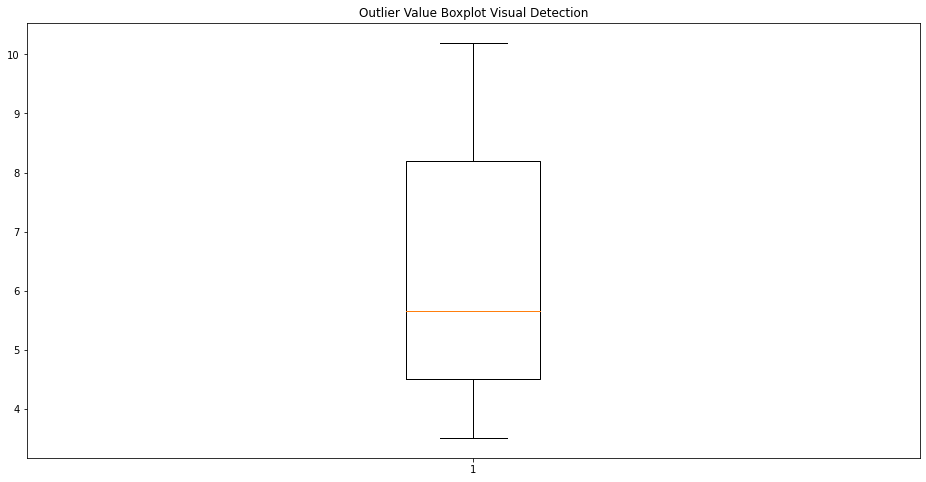

No outliers detected


In [47]:
outlier_v(indice["Actual"])

# <font color= #6B6B6B> 5. Computational Aspects
</font>

<hr style="border:0.02in solid gray"> </hr>

In [4]:
# DELETE THIS CELL IN YOUR FILE

# Another particular process that is relevant for the work. Normally, you include between 2 and 5 at the most.

<br>

<br>

# <font color= #6B6B6B> <font size = 6> Backtesting and optimization </font>

<hr style="border:0.02in solid gray"> </hr>

In [5]:
# DELETE THIS CELL IN YOUR FILE

# In here you present the general results, and also, a discussion of such results.

<br>

## <font color= #6B6B6B> 5.1 Results of first processes </font>

In [6]:
# DELETE THIS CELL IN YOUR FILE

# Separate your results according to the main processes you are working on

<br>

## <font color= #6B6B6B> 5.2 Results of another proces </font>

In [7]:
# DELETE THIS CELL IN YOUR FILE

# You can have several processes with which you are obtaining the results you need.

<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).

[2] Box, G. E. P., and Jenkins, G. (1976), Time Series Analysis: Forecasting and Control, Holden-Day.

[3] Jason Brownlee. (2016). How to Identify and Remove Seasonality from Time Series Data with Python. 07/013/2021, de Machine Learning Mastery Sitio web: https://machinelearningmastery.com/time-series-seasonality-with-python/#:~:text=Time%20series%20data%20may%20contain,patterns%20within%20any%20fixed%20period.

[4] Grubbs, Frank (February 1969), Procedures for Detecting Outlying Observations in Samples, Technometrics, 11(1), pp. 1-21.



[5] Remy Canario. (2019). Beyond QQ Plots: Tests for Heteroskedasticity in Python. 07/14/2021, de Medium Sitio web: https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab

<br>